In [0]:
import os
from google.colab import drive
drive.mount('/content/drive')
os.chdir('/content/drive/My Drive/fer')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


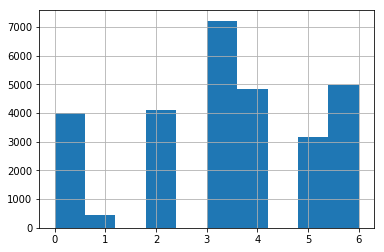

In [0]:
import pandas as pd
import numpy as np
# df=pd.read_csv("Train_Data.csv")
df['emotion'].hist()

In [0]:
from scipy.io import loadmat
import pandas as pd
import numpy as np
from random import shuffle
import os
import cv2

def loaddataset(filename):
  data = pd.read_csv(filename)
  pixels = data['pixels'].tolist()
  width, height = 48, 48
  faces = []
  for pixel_sequence in pixels:
      face = [int(pixel) for pixel in pixel_sequence.split(' ')]
      face = np.asarray(face)#.reshape(width, height)
  #     face = cv2.resize(face.astype('uint8'),(48,48))
      faces.append(face.astype('float32'))
  faces = np.asarray(faces)
  faces = np.expand_dims(faces, -1)
  emotions = pd.get_dummies(data['emotion']).as_matrix()
  return faces,emotions
trainx,trainy = loaddataset('Train_Data.csv')
testx,testy=loaddataset('Test_Data.csv')
valx,valy=loaddataset('Validation_Data.csv')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


In [0]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.optimizers import Adadelta
from keras.utils import np_utils
from keras.utils.vis_utils import plot_model
# from keras.regularizers import l2

In [0]:
trainx1=trainx.astype('float32') / 255
mean, std = np.mean(trainx1), np.std(trainx1)
train_X = np.asarray([(np.array(xi)-mean) for xi in trainx1])


testx1=testx.astype('float32') / 255
mean, std = np.mean(testx1), np.std(testx1)
test_X = np.asarray([(np.array(xi)-mean) for xi in testx1])

valx1=valx.astype('float32') / 255
mean, std = np.mean(valx1), np.std(valx1)
val_X = np.asarray([(np.array(xi)-mean) for xi in valx1])

train_X = train_X.reshape(train_X.shape[0], 48, 48)
train_X = train_X.reshape(train_X.shape[0], 48, 48, 1)
val_X = val_X.reshape(val_X.shape[0],48, 48)
val_X = val_X.reshape(val_X.shape[0],48, 48,1)
test_X = test_X.reshape(test_X.shape[0],48, 48)  
test_X = test_X.reshape(test_X.shape[0],48, 48, 1) 

train_Y=trainy
val_Y=valy
test_Y=testy

In [0]:
test_X.shape

(3589, 48, 48, 1)

My Model


In [0]:
def model_generate():
    img_rows, img_cols = 48, 48
    model = Sequential()
    model.add(Convolution2D(64, 5, 5, border_mode='valid',
                            input_shape=(48, 48,1)))
    model.add(keras.layers.advanced_activations.PReLU(init='zero', weights=None))
    model.add(keras.layers.convolutional.ZeroPadding2D(padding=(2, 2), dim_ordering='th'))
    model.add(MaxPooling2D(pool_size=(5, 5),strides=(2, 2)))
      
    model.add(keras.layers.convolutional.ZeroPadding2D(padding=(1, 1), dim_ordering='th')) 
    model.add(Convolution2D(64, 3, 3))
    model.add(keras.layers.advanced_activations.PReLU(init='zero', weights=None))
    model.add(keras.layers.convolutional.ZeroPadding2D(padding=(1, 1), dim_ordering='th')) 
    model.add(Convolution2D(64, 3, 3))
    model.add(keras.layers.advanced_activations.PReLU(init='zero', weights=None))
    model.add(keras.layers.convolutional.AveragePooling2D(pool_size=(3, 3),strides=(2, 2)))
     
    model.add(keras.layers.convolutional.ZeroPadding2D(padding=(1, 1), dim_ordering='th'))
    model.add(Convolution2D(128, 3, 3))
    model.add(keras.layers.advanced_activations.PReLU(init='zero', weights=None))
    model.add(keras.layers.convolutional.ZeroPadding2D(padding=(1, 1), dim_ordering='th'))
    model.add(Convolution2D(128, 3, 3))
    model.add(keras.layers.advanced_activations.PReLU(init='zero', weights=None))
     
    model.add(keras.layers.convolutional.ZeroPadding2D(padding=(1, 1), dim_ordering='th'))
    model.add(keras.layers.convolutional.AveragePooling2D(pool_size=(3, 3),strides=(2, 2)))
     
    model.add(Flatten())
    model.add(Dense(4096))
    model.add(keras.layers.advanced_activations.PReLU(init='zero', weights=None))
    model.add(Dropout(0.2))
    model.add(Dense(4096))
    model.add(keras.layers.advanced_activations.PReLU(init='zero', weights=None))
    model.add(Dropout(0.2))
     
      
    model.add(Dense(7))  
    model.add(Activation('softmax'))

    ada = Adadelta(lr=0.1, rho=0.95, epsilon=1e-08)
    model.compile(loss='categorical_crossentropy',
                  optimizer=ada,
                  metrics=['accuracy'])
    model.summary()
    plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)
    return model


model = model_generate()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (5, 5), input_shape=(48, 48, 1..., padding="valid")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `PReLU` call to the Keras 2 API: `PReLU(weights=None, alpha_initializer="zero")`
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `ZeroPadding2D` call to the Keras 2 API: `ZeroPadding2D(padding=(2, 2), data_format="channels_first")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `ZeroPadding2D` call to the Keras 2 API: `ZeroPadding2D(padding=(1, 1), data_format="channels_first")`
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3))`
  if sys.path[0] == '':
/usr/local/

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_34 (Conv2D)           (None, 44, 44, 64)        1664      
_________________________________________________________________
p_re_lu_8 (PReLU)            (None, 44, 44, 64)        123904    
_________________________________________________________________
zero_padding2d_7 (ZeroPaddin (None, 44, 48, 68)        0         
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 20, 22, 68)        0         
_________________________________________________________________
zero_padding2d_8 (ZeroPaddin (None, 20, 24, 70)        0         
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 18, 22, 64)        40384     
_________________________________________________________________
p_re_lu_9 (PReLU)            (None, 18, 22, 64)        25344     
__________

In [0]:
img_rows, img_cols = 48, 48
batch_size = 128
nb_classes = 7
nb_epoch = 50
img_channels = 1
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,  # apply ZCA whitening
    rotation_range=40,  # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=True,  # randomly flip images
    vertical_flip=False)  # randomly flip images

valid_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

datagen.fit(train_X)

train_generator=datagen.flow(train_X, train_Y,batch_size=batch_size)

validation_generator = valid_datagen.flow(val_X,val_Y,batch_size=batch_size)

test_generator = valid_datagen.flow(test_X,test_Y,batch_size=batch_size)

model.fit_generator(train_generator,
                    samples_per_epoch=train_X.shape[0],
                    nb_epoch=nb_epoch,
                    validation_data=(val_X, val_Y))

train_loss, test_acc = model.evaluate_generator(generator=train_generator,steps=batch_size)
print("Train Accuracy: "+ repr(test_acc*100) + '%')
print("Train Loss: " + repr(train_loss))

train_loss, test_acc = model.evaluate_generator(generator=validation_generator,steps=batch_size)
print("Validation Accuracy: "+ repr(test_acc*100) + '%')
print("Validation Loss: " + repr(train_loss))

train_loss, test_acc = model.evaluate_generator(generator=test_generator,steps=batch_size)
print("Testing Accuracy: "+ repr(test_acc*100) + '%')
print("Testing Loss: " + repr(train_loss))


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., steps_per_epoch=224, epochs=50)`


Epoch 1/50
224/224 [==============================] - 28s 124ms/step - loss: 1.7442 - acc: 0.2828 - val_loss: 1.7315 - val_acc: 0.2990
Epoch 2/50
224/224 [==============================] - 28s 123ms/step - loss: 1.7445 - acc: 0.2810 - val_loss: 1.7083 - val_acc: 0.3093
Epoch 3/50
224/224 [==============================] - 28s 123ms/step - loss: 1.7404 - acc: 0.2848 - val_loss: 1.7146 - val_acc: 0.3096
Epoch 4/50
224/224 [==============================] - 28s 123ms/step - loss: 1.7370 - acc: 0.2846 - val_loss: 1.7034 - val_acc: 0.3221
Epoch 5/50
224/224 [==============================] - 28s 123ms/step - loss: 1.7357 - acc: 0.2909 - val_loss: 1.6838 - val_acc: 0.3313
Epoch 6/50
224/224 [==============================] - 27s 123ms/step - loss: 1.7289 - acc: 0.2938 - val_loss: 1.7333 - val_acc: 0.3015
Epoch 7/50
224/224 [==============================] - 27s 123ms/step - loss: 1.7276 - acc: 0.2947 - val_loss: 1.6804 - val_acc: 0.3330
Epoch 8/50
224/224 [==============================] - 2

In [0]:
# from keras.preprocessing.image import ImageDataGenerator
# gen = ImageDataGenerator()
# train_generator = gen.flow(train_X, train_Y, batch_size=32)
# model.fit_generator(train_generator, steps_per_epoch=32, epochs=1)

history=model.fit(train_X, train_Y, epochs=50, batch_size=128,validation_data=(val_X, val_Y))
train_loss, test_acc = model.evaluate(train_X, train_Y)
print("Accuracy: "+ repr(test_acc*100) + '%')
print("Train Loss: " + repr(train_loss))
train_loss, test_acc = model.evaluate(val_X, val_Y)
print("Accuracy: "+ repr(test_acc*100) + '%')
print("Validation Loss: " + repr(train_loss))
test_loss, test_acc = model.evaluate(test_X, test_Y)
print("Accuracy: "+ repr(test_acc*100) + '%')
print("Test Loss: " + repr(test_loss))

Train on 28709 samples, validate on 3589 samples
Epoch 1/50
28709/28709 [==============================] - 27s 956us/step - loss: 1.4414 - acc: 0.4443 - val_loss: 1.4339 - val_acc: 0.4425
Epoch 2/50
28709/28709 [==============================] - 27s 955us/step - loss: 1.4139 - acc: 0.4590 - val_loss: 1.4294 - val_acc: 0.4494
Epoch 3/50
28709/28709 [==============================] - 27s 953us/step - loss: 1.3974 - acc: 0.4652 - val_loss: 1.4591 - val_acc: 0.4402
Epoch 4/50
28709/28709 [==============================] - 27s 955us/step - loss: 1.3845 - acc: 0.4704 - val_loss: 1.4254 - val_acc: 0.4578
Epoch 5/50
28709/28709 [==============================] - 27s 954us/step - loss: 1.3699 - acc: 0.4772 - val_loss: 1.4201 - val_acc: 0.4636
Epoch 6/50
28709/28709 [==============================] - 27s 953us/step - loss: 1.3591 - acc: 0.4818 - val_loss: 1.3684 - val_acc: 0.4792
Epoch 7/50
28709/28709 [==============================] - 27s 957us/step - loss: 1.3473 - acc: 0.4864 - val_loss: 1.6

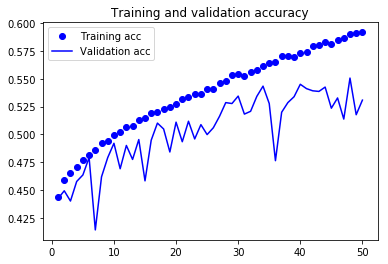

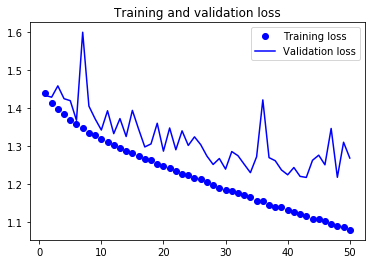

In [0]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

New Try

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_49 (Conv2D)           (None, 48, 48, 64)        640       
_________________________________________________________________
conv2d_50 (Conv2D)           (None, 48, 48, 64)        36928     
_________________________________________________________________
max_pooling2d_31 (MaxPooling (None, 24, 24, 64)        0         
_________________________________________________________________
batch_normalization_5 (Batch (None, 24, 24, 64)        256       
_________________________________________________________________
dropout_10 (Dropout)         (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_51 (Conv2D)           (None, 24, 24, 128)       73856     
_________________________________________________________________
conv2d_52 (Conv2D)           (None, 24, 24, 128)       147584    
__________

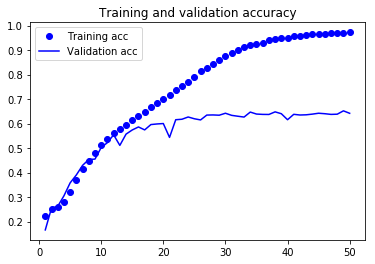

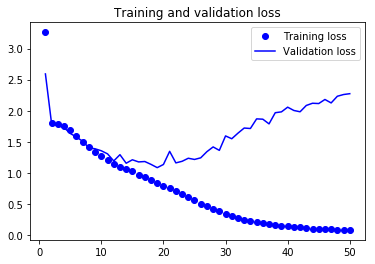

In [0]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers.normalization import BatchNormalization
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.convolutional import ZeroPadding2D
from keras.optimizers import Adam



number_of_classes = 7
dimension = 48
number_of_channels = 1
model = Sequential()
model.add(Conv2D(64, (3, 3), input_shape=(48, 48 ,1), padding='same', activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(number_of_classes, activation='softmax'))

# Compile model
epochs = 50
lrate = 0.01
decay = lrate/epochs
adam = Adam(decay=decay)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
print(model.summary())

history=model.fit(train_X, train_Y, epochs=epochs, batch_size=128,validation_data=(val_X, val_Y))
train_loss, test_acc = model.evaluate(train_X, train_Y)
print("Accuracy: "+ repr(test_acc*100) + '%')
print("Train Loss: " + repr(train_loss))
train_loss, test_acc = model.evaluate(val_X, val_Y)
print("Accuracy: "+ repr(test_acc*100) + '%')
print("Validation Loss: " + repr(train_loss))
test_loss, test_acc = model.evaluate(test_X, test_Y)
print("Accuracy: "+ repr(test_acc*100) + '%')
print("Test Loss: " + repr(test_loss))
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_59 (Conv2D)           (None, 48, 48, 64)        640       
_________________________________________________________________
conv2d_60 (Conv2D)           (None, 48, 48, 64)        36928     
_________________________________________________________________
max_pooling2d_35 (MaxPooling (None, 24, 24, 64)        0         
_________________________________________________________________
batch_normalization_9 (Batch (None, 24, 24, 64)        256       
_________________________________________________________________
dropout_15 (Dropout)         (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_61 (Conv2D)           (None, 24, 24, 128)       73856     
_________________________________________________________________
conv2d_62 (Conv2D)           (None, 24, 24, 128)       147584    
__________

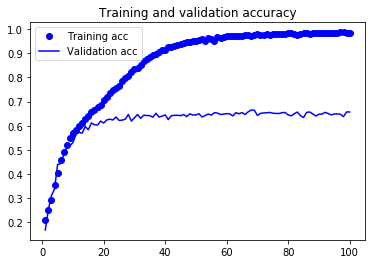

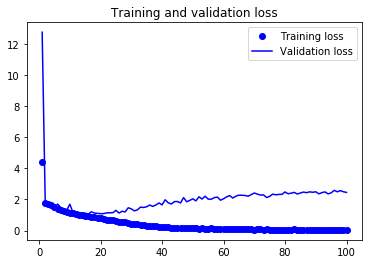

In [0]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers.normalization import BatchNormalization
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.convolutional import ZeroPadding2D
from keras.optimizers import Adam



number_of_classes = 7
dimension = 48
number_of_channels = 1
model = Sequential()
model.add(Conv2D(64, (3, 3), input_shape=(48, 48 ,1), padding='same', activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(number_of_classes, activation='softmax'))

# Compile model
epochs = 100
lrate = 0.01
decay = lrate/epochs
adam = Adam(decay=decay)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
print(model.summary())

history=model.fit(train_X, train_Y, epochs=epochs, batch_size=128,validation_data=(val_X, val_Y))
train_loss, test_acc = model.evaluate(train_X, train_Y)
print("Accuracy: "+ repr(test_acc*100) + '%')
print("Train Loss: " + repr(train_loss))
train_loss, test_acc = model.evaluate(val_X, val_Y)
print("Accuracy: "+ repr(test_acc*100) + '%')
print("Validation Loss: " + repr(train_loss))
test_loss, test_acc = model.evaluate(test_X, test_Y)
print("Accuracy: "+ repr(test_acc*100) + '%')
print("Test Loss: " + repr(test_loss))
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_69 (Conv2D)           (None, 48, 48, 64)        640       
_________________________________________________________________
conv2d_70 (Conv2D)           (None, 48, 48, 64)        36928     
_________________________________________________________________
max_pooling2d_39 (MaxPooling (None, 24, 24, 64)        0         
_________________________________________________________________
batch_normalization_13 (Batc (None, 24, 24, 64)        256       
_________________________________________________________________
dropout_20 (Dropout)         (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_71 (Conv2D)           (None, 24, 24, 128)       73856     
_________________________________________________________________
conv2d_72 (Conv2D)           (None, 24, 24, 128)       147584    
__________

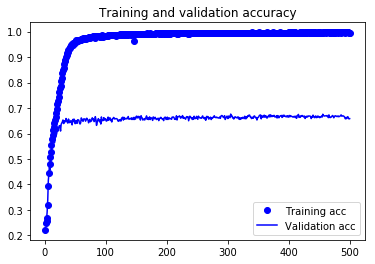

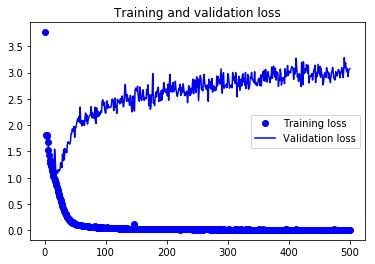

In [0]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers.normalization import BatchNormalization
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.convolutional import ZeroPadding2D
from keras.optimizers import Adam



number_of_classes = 7
dimension = 48
number_of_channels = 1
model = Sequential()
model.add(Conv2D(64, (3, 3), input_shape=(48, 48 ,1), padding='same', activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(number_of_classes, activation='softmax'))

# Compile model
epochs = 500
lrate = 0.01
decay = lrate/epochs
adam = Adam(decay=decay)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
print(model.summary())
model.save('500epochs.h5')
history=model.fit(train_X, train_Y, epochs=epochs, batch_size=128,validation_data=(val_X, val_Y))
train_loss, test_acc = model.evaluate(train_X, train_Y)
print("Accuracy: "+ repr(test_acc*100) + '%')
print("Train Loss: " + repr(train_loss))
train_loss, test_acc = model.evaluate(val_X, val_Y)
print("Accuracy: "+ repr(test_acc*100) + '%')
print("Validation Loss: " + repr(train_loss))
test_loss, test_acc = model.evaluate(test_X, test_Y)
print("Accuracy: "+ repr(test_acc*100) + '%')
print("Test Loss: " + repr(test_loss))
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

Saving the model for 100 epochs

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 48, 48, 64)        640       
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 48, 48, 64)        36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 24, 24, 64)        0         
_________________________________________________________________
batch_normalization_5 (Batch (None, 24, 24, 64)        256       
_________________________________________________________________
dropout_6 (Dropout)          (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 24, 24, 128)       73856     
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 24, 24, 128)       147584    
__________

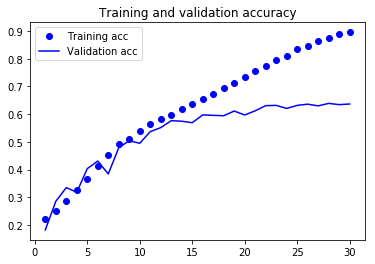

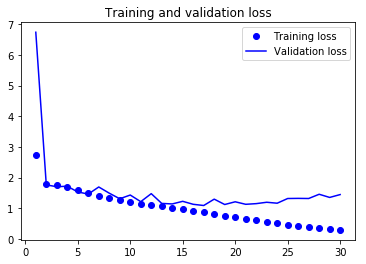

In [0]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers.normalization import BatchNormalization
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.convolutional import ZeroPadding2D
from keras.optimizers import Adam



number_of_classes = 7
dimension = 48
number_of_channels = 1
model = Sequential()
model.add(Conv2D(64, (3, 3), input_shape=(48, 48 ,1), padding='same', activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(number_of_classes, activation='softmax'))

# Compile model
epochs = 30
lrate = 0.01
decay = lrate/epochs
adam = Adam(decay=decay)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
print(model.summary())


history=model.fit(train_X, train_Y, epochs=epochs, batch_size=128,validation_data=(val_X, val_Y))
train_loss, test_acc = model.evaluate(train_X, train_Y)
print("Accuracy: "+ repr(test_acc*100) + '%')
print("Train Loss: " + repr(train_loss))
train_loss, test_acc = model.evaluate(val_X, val_Y)
print("Accuracy: "+ repr(test_acc*100) + '%')
print("Validation Loss: " + repr(train_loss))
test_loss, test_acc = model.evaluate(test_X, test_Y)
print("Accuracy: "+ repr(test_acc*100) + '%')
print("Test Loss: " + repr(test_loss))
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

model.save('30epochs.h5')

In [0]:
plot_model(model, to_file='vgg.png')

Simple CNN


Train on 28709 samples, validate on 3589 samples
Epoch 1/10
28709/28709 [==============================] - 5s 176us/step - loss: 1.7710 - acc: 0.2612 - val_loss: 1.6835 - val_acc: 0.3093
Epoch 2/10
28709/28709 [==============================] - 4s 135us/step - loss: 1.5980 - acc: 0.3592 - val_loss: 1.5058 - val_acc: 0.4149
Epoch 3/10
28709/28709 [==============================] - 4s 135us/step - loss: 1.4556 - acc: 0.4289 - val_loss: 1.4213 - val_acc: 0.4533
Epoch 4/10
28709/28709 [==============================] - 4s 135us/step - loss: 1.3761 - acc: 0.4664 - val_loss: 1.3500 - val_acc: 0.4840
Epoch 5/10
28709/28709 [==============================] - 4s 135us/step - loss: 1.3122 - acc: 0.4964 - val_loss: 1.3144 - val_acc: 0.4943
Epoch 6/10
28709/28709 [==============================] - 4s 135us/step - loss: 1.2582 - acc: 0.5197 - val_loss: 1.2765 - val_acc: 0.5149
Epoch 7/10
28709/28709 [==============================] - 4s 135us/step - loss: 1.2183 - acc: 0.5391 - val_loss: 1.2588 - v

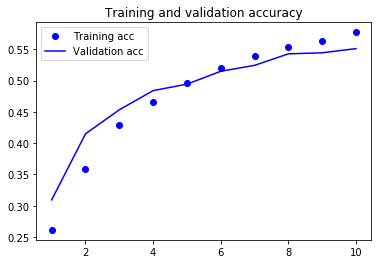

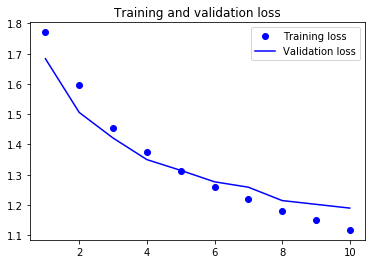

In [0]:
from keras.layers.convolutional import AveragePooling2D
model = Sequential()

#1st convolution layer
model.add(Conv2D(64, (5, 5), activation='relu', input_shape=(48,48,1)))
model.add(MaxPooling2D(pool_size=(5,5), strides=(2, 2)))

#2nd convolution layer
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(AveragePooling2D(pool_size=(3,3), strides=(2, 2)))

#3rd convolution layer
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(AveragePooling2D(pool_size=(3,3), strides=(2, 2)))

model.add(Flatten())

#fully connected neural networks
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(7, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

history=model.fit(train_X, train_Y, epochs=10, batch_size=128,validation_data=(val_X, val_Y))
train_loss, test_acc = model.evaluate(train_X, train_Y)
print("Accuracy: "+ repr(test_acc*100) + '%')
print("Train Loss: " + repr(train_loss))
train_loss, test_acc = model.evaluate(val_X, val_Y)
print("Accuracy: "+ repr(test_acc*100) + '%')
print("Validation Loss: " + repr(train_loss))
test_loss, test_acc = model.evaluate(test_X, test_Y)
print("Accuracy: "+ repr(test_acc*100) + '%')
print("Test Loss: " + repr(test_loss))
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

model.save('cnn.h5')
plot_model(model, to_file='cnn.png')

Using Data Augmentation

In [0]:
trainx=np.asarray(trainx)
valx=np.asarray(valx)
testx=np.asarray(testx)
train_X = trainx.reshape(28709, 48, 48,1)
val_X = valx.reshape(3589,48, 48,1)
test_X = testx.reshape(3589,48, 48,1)  
train_Y=trainy
val_Y=valy
test_Y=testy


In [0]:
img_rows, img_cols = 48, 48
batch_size = 64

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers.normalization import BatchNormalization
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.convolutional import ZeroPadding2D
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,  # apply ZCA whitening
    rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.3,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.3,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=True,  # randomly flip images
    vertical_flip=False)  # randomly flip images

valid_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

datagen.fit(train_X)

train_generator=datagen.flow(train_X, train_Y,batch_size=batch_size)

validation_generator = valid_datagen.flow(val_X,val_Y,batch_size=batch_size)

test_generator = test_datagen.flow(test_X,test_Y,batch_size=batch_size)

number_of_classes = 7
dimension = 48
number_of_channels = 1
model = Sequential()
model.add(Conv2D(64, (3, 3), input_shape=(48, 48 ,1), padding='same', activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(number_of_classes, activation='softmax'))

# Compile model
epochs = 100
lrate = 0.01
decay = lrate/epochs
adam = Adam(decay=decay)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])


model.fit_generator(train_generator,
                    samples_per_epoch=train_X.shape[0],
                    nb_epoch=epochs,
                    validation_data=(val_X, val_Y))

train_loss, test_acc = model.evaluate_generator(generator=train_generator,steps=batch_size)
print("Train Accuracy: "+ repr(test_acc*100) + '%')
print("Train Loss: " + repr(train_loss))

train_loss, test_acc = model.evaluate_generator(generator=validation_generator,steps=batch_size)
print("Validation Accuracy: "+ repr(test_acc*100) + '%')
print("Validation Loss: " + repr(train_loss))

train_loss, test_acc = model.evaluate_generator(generator=test_generator,steps=batch_size)
print("Testing Accuracy: "+ repr(test_acc*100) + '%')
print("Testing Loss: " + repr(train_loss))

# model.save('100epochs.h5')


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:85: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:85: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., steps_per_epoch=448, epochs=100)`


Epoch 1/100
448/448 [==============================] - 39s 87ms/step - loss: 2.8375 - acc: 0.2267 - val_loss: 3.6475 - val_acc: 0.1736
Epoch 2/100
448/448 [==============================] - 34s 76ms/step - loss: 1.9959 - acc: 0.2421 - val_loss: 1.8537 - val_acc: 0.2563
Epoch 3/100
448/448 [==============================] - 34s 76ms/step - loss: 1.8063 - acc: 0.2486 - val_loss: 1.8759 - val_acc: 0.2513
Epoch 4/100
448/448 [==============================] - 34s 76ms/step - loss: 1.8034 - acc: 0.2485 - val_loss: 1.8517 - val_acc: 0.2577
Epoch 5/100
448/448 [==============================] - 34s 76ms/step - loss: 1.7977 - acc: 0.2555 - val_loss: 1.8874 - val_acc: 0.2566
Epoch 6/100
448/448 [==============================] - 34s 76ms/step - loss: 1.7939 - acc: 0.2524 - val_loss: 1.8917 - val_acc: 0.2608
Epoch 7/100
448/448 [==============================] - 34s 76ms/step - loss: 1.7843 - acc: 0.2604 - val_loss: 1.9745 - val_acc: 0.2722
Epoch 8/100
448/448 [==============================] - 

In [0]:
model.save('100epochs_dataaug.h5')

In [0]:
predictions = model.predict_generator(generator=validation_generator,steps=batch_size)
predictions[0]

array([0.5436558 , 0.01235714, 0.03024716, 0.09112439, 0.1732681 ,
       0.02195545, 0.12739193], dtype=float32)

In [0]:
from keras.models import load_model
model = load_model('100epochs.h5')

predicted_output=model.predict(test_X[0].reshape(1,48,48,1))
predicted_output

array([[1., 0., 0., 0., 0., 0., 0.]], dtype=float32)

Stacking

In [0]:
from keras.models import load_model
import numpy as np
from scipy.io import loadmat
import pandas as pd
from random import shuffle
import os
import cv2
from numpy import dstack
from sklearn.linear_model import LogisticRegression
import sklearn
import pickle


def loaddataset(filename):
  data = pd.read_csv(filename)
  pixels = data['pixels'].tolist()
  width, height = 48, 48
  faces = []
  for pixel_sequence in pixels:
      face = [int(pixel) for pixel in pixel_sequence.split(' ')]
      face = np.asarray(face)#.reshape(width, height)
  #     face = cv2.resize(face.astype('uint8'),(48,48))
      faces.append(face.astype('float32'))
  faces = np.asarray(faces)
  faces = np.expand_dims(faces, -1)
  emotions = pd.get_dummies(data['emotion']).as_matrix()
  return faces,emotions
trainx,trainy = loaddataset('Train_Data.csv')
testx,testy=loaddataset('Test_Data.csv')
valx,valy=loaddataset('Validation_Data.csv')

trainx1=trainx.astype('float32') / 255
mean, std = np.mean(trainx1), np.std(trainx1)
train_X = np.asarray([(np.array(xi)-mean) for xi in trainx1])

testx1=testx.astype('float32') / 255
mean, std = np.mean(testx1), np.std(testx1)
test_X = np.asarray([(np.array(xi)-mean) for xi in testx1])

valx1=valx.astype('float32') / 255
mean, std = np.mean(valx1), np.std(valx1)
val_X = np.asarray([(np.array(xi)-mean) for xi in valx1])

train_X = train_X.reshape(train_X.shape[0], 48, 48)
train_X = train_X.reshape(train_X.shape[0], 48, 48, 1)
val_X = val_X.reshape(val_X.shape[0],48, 48)
val_X = val_X.reshape(val_X.shape[0],48, 48,1)
test_X = test_X.reshape(test_X.shape[0],48, 48)
test_X = test_X.reshape(test_X.shape[0],48, 48, 1)

train_Y=[np.where(r==1)[0][0] for r in trainy]
val_Y=[np.where(r==1)[0][0] for r in valy]
test_Y=[np.where(r==1)[0][0] for r in testy]

vgg_model = load_model('30epochs.h5')
ex_model = load_model('traindata_mini_XCEPTION.61-0.63.hdf5')
cnn_model=load_model('cnn.h5')
# resnet_model=load_model('resnet.h5')
# inception_model=load_model('inception.h5')
members = [resnet_model]

# def get_data(dataset):
#     file_stream = file_io.FileIO(dataset, mode='r')
#     data = pd.read_csv(file_stream)
#     pixels = data['pixels'].tolist()
#     images = np.empty((len(data), img_height, img_width, 3))
#     i = 0

#     for pixel_sequence in pixels:
#         single_image = [float(pixel) for pixel in pixel_sequence.split(' ')]  # Extraction of each single
#         single_image = np.asarray(single_image).reshape(48, 48) # Dimension: 48x48
#         single_image = resize(single_image, (img_height, img_width), order = 3, mode = 'constant') # Dimension: 139x139x3 (Bicubic)
#         ret = np.empty((img_height, img_width, 3))  
#         ret[:, :, 0] = single_image
#         ret[:, :, 1] = single_image
#         ret[:, :, 2] = single_image
#         images[i, :, :, :] = ret
#         i += 1
    
#     images = preprocess_input(images)
    

#     return images 

# create stacked model input dataset as outputs from the ensemble
from skimage.transform import resize
def stacked_dataset(members, inputX):
    stackX = None
    for model in members:
        # make prediction
#         if model==resnet_model:
#           for i in range(len(inputX)):
#             inputX[i]=inputX[i].resize(197,197,1,mode = 'constant')
#             inputX1 = np.empty((3589,197, 197))
#             inputX1[i] = resize(inputX[i], (197, 197), mode = 'constant')
#           yhat = model.predict(inputX1, verbose=0)
#         if model==inception_model:
#           for i in range(len(inputX)):
#             inputX2 = np.empty((3589,197, 197, 3))
#             inputX2[i] = resize(inputX[i], (139, 139),order=3, mode = 'constant')
#             img2 = np.zeros_like(inputX2)
#             img2[i,:,:,0] = inputX2[i]
#             img2[i,:,:,1] = inputX2[i]
#             img2[i,:,:,2] = inputX2[i]
          
#           yhat = model.predict(img2, verbose=0)
#         else:
        yhat = model.predict(inputX, verbose=0)
        # stack predictions into [rows, members, prob$abilities]
        if stackX is None:
            stackX = yhat
        else:
            stackX = dstack((stackX, yhat))
    # flatten predictions to [rows, members x probabilities]
    stackX = stackX.reshape((stackX.shape[0], stackX.shape[1]*stackX.shape[2]))
    return stackX

# fit a model based on the outputs from the ensemble members
def fit_stacked_model(members, inputX, inputy):
    # create dataset using ensemble
    stackedX = stacked_dataset(members, inputX)
    # fit standalone model
    model = LogisticRegression()
    model.fit(stackedX, inputy)
    return model

# fit stacked model using the ensemble
model = fit_stacked_model(members, test_X, test_Y)

# filename=('ensemblefinal.sav')
# pickle.dump(model, open(filename, 'wb'))

# make a prediction with the stacked model
def stacked_prediction(members, model, inputX):
    # create dataset using ensemble
    stackedX = stacked_dataset(members, inputX)
    # make a prediction
    yhat = model.predict(stackedX)
    return yhat

# # evaluate model on Train set
# yhat = stacked_prediction(members, model, train_X)
# acc = sklearn.metrics.accuracy_score(train_Y, yhat)
# print('Stacked Train Accuracy: %.3f' % acc)

# # evaluate model on Validation set
# yhat = stacked_prediction(members, model, val_X)
# acc = sklearn.metrics.accuracy_score(val_Y, yhat)
# print('Stacked Validation Accuracy: %.3f' % acc)
  
# # evaluate model on Test set
# yhat = stacked_prediction(members, model, test_X)
# acc = sklearn.metrics.accuracy_score(test_Y, yhat)
# print('Stacked Test Accuracy: %.3f' % acc)

In [0]:
test_X.shape

(3589, 48, 48, 1)

In [0]:
from keras.models import load_model
import numpy as np
from scipy.io import loadmat
import pandas as pd
from random import shuffle
import os
import cv2
from numpy import dstack
from sklearn.linear_model import LogisticRegression
import sklearn
import pickle

def loaddataset(filename):
  data = pd.read_csv(filename)
  pixels = data['pixels'].tolist()
  width, height = 48, 48
  faces = []
  for pixel_sequence in pixels:
      face = [int(pixel) for pixel in pixel_sequence.split(' ')]
      face = np.asarray(face)#.reshape(width, height)
  #     face = cv2.resize(face.astype('uint8'),(48,48))
      faces.append(face.astype('float32'))
  faces = np.asarray(faces)
  faces = np.expand_dims(faces, -1)
  emotions = pd.get_dummies(data['emotion']).as_matrix()
  return faces,emotions
trainx,trainy = loaddataset('Train_Data.csv')
testx,testy=loaddataset('Test_Data.csv')
valx,valy=loaddataset('Validation_Data.csv')

trainx1=trainx.astype('float32') / 255
mean, std = np.mean(trainx1), np.std(trainx1)
train_X = np.asarray([(np.array(xi)-mean) for xi in trainx1])

testx1=testx.astype('float32') / 255
mean, std = np.mean(testx1), np.std(testx1)
test_X = np.asarray([(np.array(xi)-mean) for xi in testx1])

valx1=valx.astype('float32') / 255
mean, std = np.mean(valx1), np.std(valx1)
val_X = np.asarray([(np.array(xi)-mean) for xi in valx1])

train_X = train_X.reshape(train_X.shape[0], 48, 48)
train_X = train_X.reshape(train_X.shape[0], 48, 48, 1)
val_X = val_X.reshape(val_X.shape[0],48, 48)
val_X = val_X.reshape(val_X.shape[0],48, 48,1)
test_X = test_X.reshape(test_X.shape[0],48, 48)
test_X = test_X.reshape(test_X.shape[0],48, 48, 1)

train_Y=[np.where(r==1)[0][0] for r in trainy]
val_Y=[np.where(r==1)[0][0] for r in valy]
test_Y=[np.where(r==1)[0][0] for r in testy]


def stacked_dataset(members, inputX):
    stackX = None
    for model in members:

        yhat = model.predict(inputX, verbose=0)
        # stack predictions into [rows, members, prob$abilities]
        if stackX is None:
            stackX = yhat
        else:
            stackX = dstack((stackX, yhat))
    # flatten predictions to [rows, members x probabilities]
    stackX = stackX.reshape((stackX.shape[0], stackX.shape[1]*stackX.shape[2]))
    return stackX
  
def stacked_prediction(members, model, inputX):
    # create dataset using ensemble
    stackedX = stacked_dataset(members, inputX)
    # make a prediction
    yhat = model.predict(stackedX)
    return yhat
vgg_model = load_model('30epochs.h5')
ex_model = load_model('traindata_mini_XCEPTION.61-0.63.hdf5')
cnn_model=load_model('cnn.h5')
# resnet_model=load_model('resnet.h5')
# inception_model=load_model('inception.h5')
members = [vgg_model,ex_model,cnn_model]
  
model = pickle.load(open('ensembleone.sav', 'rb'))
# evaluate model on Train set
yhat = stacked_prediction(members, model, train_X)
acc = sklearn.metrics.accuracy_score(train_Y, yhat)
print('Stacked Train Accuracy: %.3f' % acc)

# evaluate model on Validation set
yhat = stacked_prediction(members, model, val_X)
acc = sklearn.metrics.accuracy_score(val_Y, yhat)
print('Stacked Validation Accuracy: %.3f' % acc)
  
# evaluate model on Test set
yhat = stacked_prediction(members, model, test_X)
acc = sklearn.metrics.accuracy_score(test_Y, yhat)
print('Stacked Test Accuracy: %.3f' % acc)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


Stacked Train Accuracy: 0.917
Stacked Validation Accuracy: 0.662
Stacked Test Accuracy: 0.687


Inception Resnet

In [0]:
from skimage.transform import resize
from keras.models import load_model
import numpy as np
from scipy.io import loadmat
import pandas as pd
from random import shuffle
import os
import cv2
from numpy import dstack
from sklearn.linear_model import LogisticRegression
import sklearn
import pickle

def loaddataset(filename):
  data = pd.read_csv(filename)
  pixels = data['pixels'].tolist()
  width, height = 48, 48
  faces = []
  for pixel_sequence in pixels:
      face = [int(pixel) for pixel in pixel_sequence.split(' ')]
      face = np.asarray(face)#.reshape(width, height)
  #     face = cv2.resize(face.astype('uint8'),(48,48))
      faces.append(face.astype('float32'))
  faces = np.asarray(faces)
  faces = np.expand_dims(faces, -1)
  emotions = pd.get_dummies(data['emotion']).as_matrix()
  return faces,emotions
trainx,trainy = loaddataset('Train_Data.csv')
testx,testy=loaddataset('Test_Data.csv')
valx,valy=loaddataset('Validation_Data.csv')

trainx1=trainx.astype('float32') / 255
mean, std = np.mean(trainx1), np.std(trainx1)
train_X = np.asarray([(np.array(xi)-mean) for xi in trainx1])

testx1=testx.astype('float32') / 255
mean, std = np.mean(testx1), np.std(testx1)
test_X = np.asarray([(np.array(xi)-mean) for xi in testx1])

valx1=valx.astype('float32') / 255
mean, std = np.mean(valx1), np.std(valx1)
val_X = np.asarray([(np.array(xi)-mean) for xi in valx1])

train_X = train_X.reshape(train_X.shape[0], 48, 48)
# train_X = train_X.reshape(train_X.shape[0], 48, 48, 1)
val_X = val_X.reshape(val_X.shape[0],48, 48)
# val_X = val_X.reshape(val_X.shape[0],48, 48,1)
test_X = test_X.reshape(test_X.shape[0],48, 48)
# test_X = test_X.reshape(test_X.shape[0],48, 48, 1)

train_Y=[np.where(r==1)[0][0] for r in trainy]
val_Y=[np.where(r==1)[0][0] for r in valy]
test_Y=[np.where(r==1)[0][0] for r in testy]

img_height, img_width = 197, 197

def stacked_dataset(members, inputX):
    stackX = None
    for model in members:
        if model==resnet_model:
          inputX = inputX.reshape(inputX.shape[0],48, 48)
          images = np.empty((3589, img_height, img_width, 3))
          for i in range(3589):
            
            single_image=inputX[i]
            single_image = resize(single_image, (img_height, img_width), order = 3, mode = 'constant') # Dimension: 139x139x3 (Bicubic)
            ret = np.empty((img_height, img_width, 3))  
            ret[:, :, 0] = single_image
            ret[:, :, 1] = single_image
            ret[:, :, 2] = single_image
            images[i, :, :, :] = ret
          
          yhat = model.predict(images, verbose=0)
        elif model==inception_model:
          inputX = inputX.reshape(inputX.shape[0],48, 48)
          images1 = np.empty((3589, img_height, img_width, 3))
          for i in range(3589):
            
            single_image=inputX[i]
            single_image = resize(single_image, (139, 139), order = 3, mode = 'constant') # Dimension: 139x139x3 (Bicubic)
            ret = np.empty((img_height, img_width, 3))  
            ret[:, :, 0] = single_image
            ret[:, :, 1] = single_image
            ret[:, :, 2] = single_image
            images1[i, :, :, :] = ret
          
          yhat = model.predict(images1, verbose=0)
        else:
          inputX = inputX.reshape(inputX.shape[0],48, 48, 1)
          yhat = model.predict(inputX, verbose=0)
        # stack predictions into [rows, members, prob$abilities]
        inputX = inputX.reshape(inputX.shape[0],48, 48, 1)
        if stackX is None:
            stackX = yhat
        else:
            stackX = dstack((stackX, yhat))
    # flatten predictions to [rows, members x probabilities]
    stackX = stackX.reshape((stackX.shape[0], stackX.shape[1]*stackX.shape[2]))
    return stackX
  
def stacked_prediction(members, model, inputX):
    # create dataset using ensemble
    stackedX = stacked_dataset(members, inputX)
    # make a prediction
    yhat = model.predict(stackedX)
    return yhat

# fit a model based on the outputs from the ensemble members
def fit_stacked_model(members, inputX, inputy):
    # create dataset using ensemble
    stackedX = stacked_dataset(members, inputX)
    # fit standalone model
    model = LogisticRegression()
    model.fit(stackedX, inputy)
    return model


# vgg_model = load_model('30epochs.h5')
# ex_model = load_model('traindata_mini_XCEPTION.61-0.63.hdf5')
cnn_model=load_model('cnn.h5')
resnet_model=load_model('resnet.h5')
inception_model=load_model('inception.h5')
# inceptionres=load_model('inceptionres.h5')
members = [inception_model,resnet_model]


# fit stacked model using the ensemble
model = fit_stacked_model(members, test_X, test_Y)

yhat = stacked_prediction(members, model, train_X)
acc = sklearn.metrics.accuracy_score(train_Y, yhat)
print('Stacked Train Accuracy: %.3f' % acc)

# evaluate model on Validation set
yhat = stacked_prediction(members, model, val_X)
acc = sklearn.metrics.accuracy_score(val_Y, yhat)
print('Stacked Validation Accuracy: %.3f' % acc)
  
# evaluate model on Test set
yhat = stacked_prediction(members, model, test_X)
acc = sklearn.metrics.accuracy_score(test_Y, yhat)
print('Stacked Test Accuracy: %.3f' % acc)


Stacking Method 2

In [0]:
from keras.models import load_model
import numpy as np
from scipy.io import loadmat
import pandas as pd
from random import shuffle
import os
import cv2
from numpy import dstack
from sklearn.linear_model import LogisticRegression
import sklearn
from keras.layers import concatenate
from keras.models import Model

# def loaddataset(filename):
#   data = pd.read_csv(filename)
#   pixels = data['pixels'].tolist()
#   width, height = 48, 48
#   faces = []
#   for pixel_sequence in pixels:
#       face = [int(pixel) for pixel in pixel_sequence.split(' ')]
#       face = np.asarray(face)#.reshape(width, height)
#   #     face = cv2.resize(face.astype('uint8'),(48,48))
#       faces.append(face.astype('float32'))
#   faces = np.asarray(faces)
#   faces = np.expand_dims(faces, -1)
#   emotions = pd.get_dummies(data['emotion']).as_matrix()
#   return faces,emotions
# trainx,trainy = loaddataset('Train_Data.csv')
# testx,testy=loaddataset('Test_Data.csv')
# valx,valy=loaddataset('Validation_Data.csv')

# trainx1=trainx.astype('float32') / 255
# mean, std = np.mean(trainx1), np.std(trainx1)
# train_X = np.asarray([(np.array(xi)-mean) for xi in trainx1])


# testx1=testx.astype('float32') / 255
# mean, std = np.mean(testx1), np.std(testx1)
# test_X = np.asarray([(np.array(xi)-mean) for xi in testx1])

# valx1=valx.astype('float32') / 255
# mean, std = np.mean(valx1), np.std(valx1)
# val_X = np.asarray([(np.array(xi)-mean) for xi in valx1])

# train_X = train_X.reshape(train_X.shape[0], 48, 48)
# train_X = train_X.reshape(train_X.shape[0], 48, 48, 1)
# val_X = val_X.reshape(val_X.shape[0],48, 48)
# val_X = val_X.reshape(val_X.shape[0],48, 48,1)
# test_X = test_X.reshape(test_X.shape[0],48, 48)
# test_X = test_X.reshape(test_X.shape[0],48, 48, 1)

# train_Y=[np.where(r==1)[0][0] for r in trainy]
# val_Y=[np.where(r==1)[0][0] for r in valy]
# test_Y=[np.where(r==1)[0][0] for r in testy]


vgg_model = load_model('30epochs.h5')
ex_model = load_model('traindata_mini_XCEPTION.61-0.63.hdf5')
cnn_model=load_model('cnn.h5')
members = [vgg_model,ex_model]

# update all layers in all models to not be trainable
for i in range(len(members)):
	model = members[i]
	for layer in model.layers:
		# make not trainable
		layer.trainable = False
		# rename to avoid 'unique layer name' issue
		layer.name = 'ensemble_' + str(i+1) + '_' + layer.name
    
# define stacked model from multiple member input models
def define_stacked_model(members):
	# update all layers in all models to not be trainable
	for i in range(len(members)):
		model = members[i]
		for layer in model.layers:
			# make not trainable
			layer.trainable = False
			# rename to avoid 'unique layer name' issue
			layer.name = 'ensemble_' + str(i+1) + '_' + layer.name
	# define multi-headed input
	ensemble_visible = [model.input for model in members]
	# concatenate merge output from each model
	ensemble_outputs = [model.output for model in members]
	merge = concatenate(ensemble_outputs)
	hidden = Dense(10, activation='relu')(merge)
	output = Dense(7, activation='softmax')(hidden)
	model = Model(inputs=ensemble_visible, outputs=output)
	# plot graph of ensemble
	plot_model(model, show_shapes=True, to_file='ensemble.png')
	# compile
	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model

# define ensemble model
stacked_model = define_stacked_model(members)

# fit a stacked model
def fit_stacked_model(model, inputX, inputy):
	# prepare input data
	X = [inputX for _ in range(len(model.input))]
	# encode output data
	inputy_enc = keras.utils.to_categorical(inputy)
	# fit model
	model.fit(X, inputy_enc, epochs=30, verbose=0)
  
# fit stacked model on test dataset
fit_stacked_model(stacked_model, test_X, test_Y)


# make a prediction with a stacked model
def predict_stacked_model(model, inputX):
	# prepare input data
	X = [inputX for _ in range(len(model.input))]
	# make prediction
	return model.predict(X, verbose=0)

# evaluate model on Train set
yhat = stacked_prediction(members, model, train_X)
yhat = np.argmax(yhat, axis=1)
acc = sklearn.metrics.accuracy_score(train_Y, yhat)
print('Stacked Train Accuracy: %.3f' % acc)

# evaluate model on Validation set
yhat = predict_stacked_model(stacked_model, val_X)
yhat = np.argmax(yhat, axis=1)
acc = sklearn.metrics.accuracy_score(val_Y, yhat)
print('Stacked Validation Accuracy: %.3f' % acc)
  
# evaluate model on Test set
yhat = predict_stacked_model(stacked_model, test_X)
yhat = np.argmax(yhat, axis=1)
acc = sklearn.metrics.accuracy_score(test_Y, yhat)
print('Stacked Test Accuracy: %.3f' % acc)

model.save('ensembletwo.h5')

ValueError: ignored